In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

# Configurações visuais (Estética)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. CARREGAR DADOS
# Certifique-se de que o arquivo está na mesma pasta do notebook
ARQUIVO = r"C:\Users\ACER\Desktop\GRADUAÇÃO I.A\\2º Periodo\Ciencia de Dados\Raspagem de Dados - Scraper\Raspagem de Dados - Scraper\\dataset_google-maps-extractor_2025-11-22_22-27-24-517.json"

try:
    with open(ARQUIVO, 'r', encoding='utf-8') as f:
        data = json.load(f)
        df = pd.json_normalize(data)
        print(f"Sucesso! Carregadas {df.shape[0]} linhas e {df.shape[1]} colunas.")
except Exception as e:
    print(f"Erro ao carregar arquivo: {e}")

# --- FUNÇÕES DE LIMPEZA E EXTRAÇÃO ---

def verificar_info_aninhada(linha, chave_principal, sub_chave):
    """
    Verifica se uma característica existe dentro das informações adicionais.
    Ex: Procura 'Entrega' dentro de 'Opções de serviço'.
    """
    try:
        # Converte para texto para facilitar a busca
        info_str = str(linha.get('additionalInfo', {}))
        # Busca a palavra-chave no texto
        if sub_chave in info_str:
            return True
        return False
    except:
        return False



Sucesso! Carregadas 15 linhas e 51 colunas.


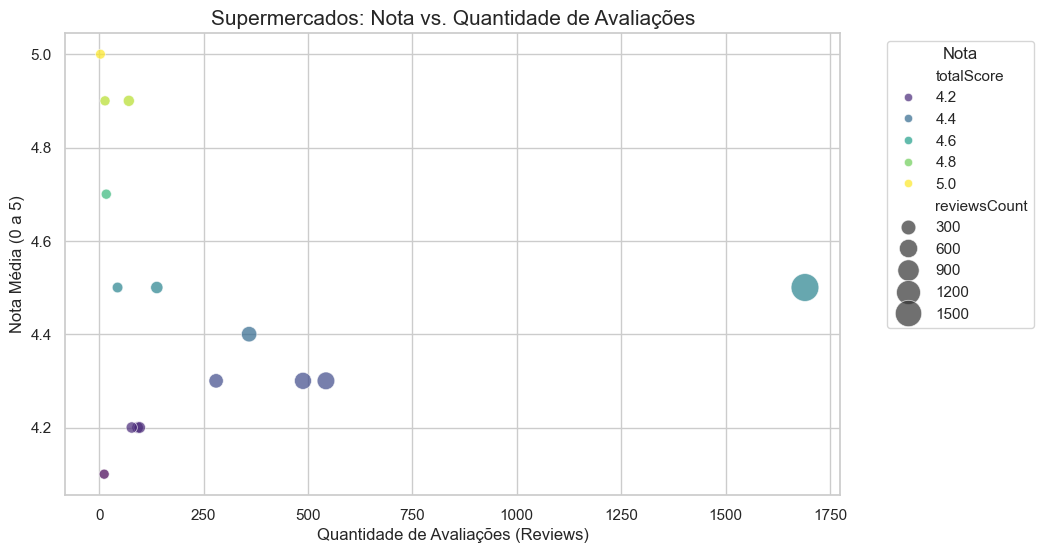

In [20]:
# 2. GRÁFICO: NOTAS vs AVALIAÇÕES

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='reviewsCount',
    y='totalScore',
    hue='totalScore',      # Cor baseada na nota
    size='reviewsCount',   # Tamanho da bolinha baseado na popularidade
    sizes=(50, 400),
    palette='viridis',
    alpha=0.7
)

plt.title('Supermercados: Nota vs. Quantidade de Avaliações', fontsize=15)
plt.xlabel('Quantidade de Avaliações (Reviews)')
plt.ylabel('Nota Média (0 a 5)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Nota") # Legenda fora
plt.show()

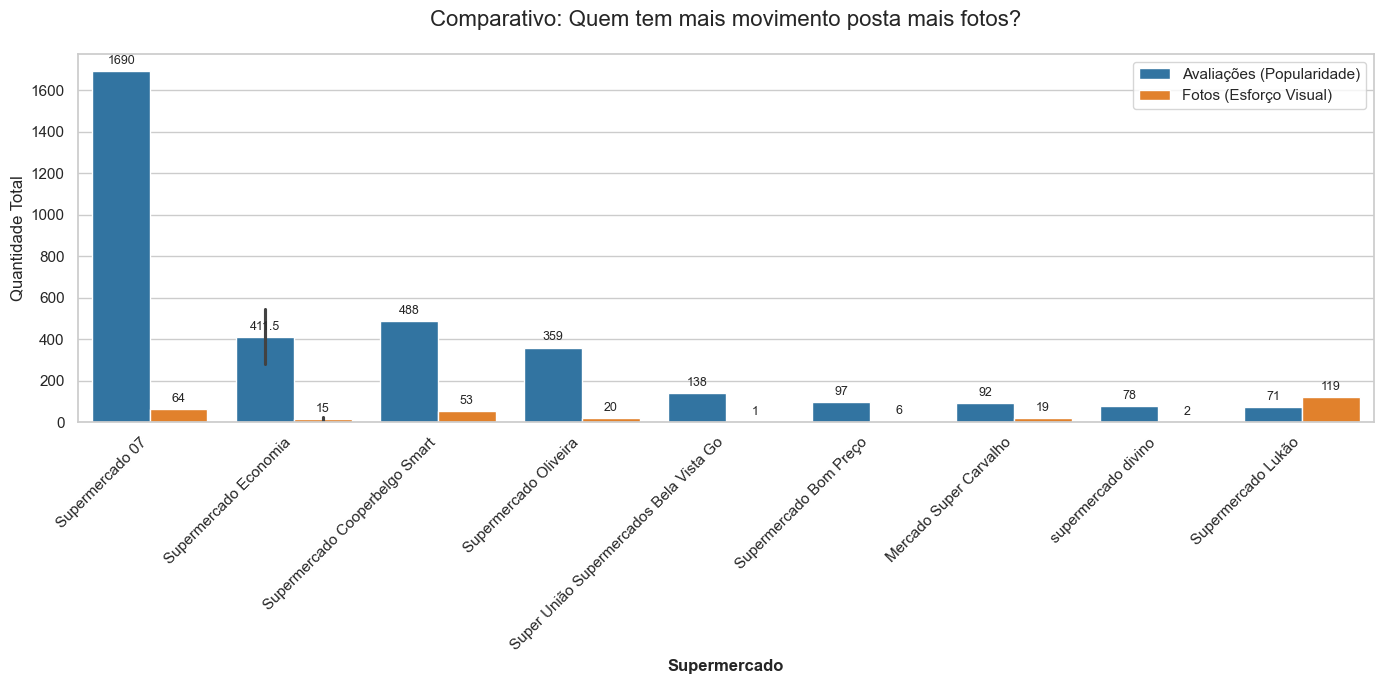

In [21]:
# 3. GRÁFICO (NOVO): COLUNAS AGRUPADAS (REVIEWS vs. FOTOS)

if 'imagesCount' in df.columns and 'reviewsCount' in df.columns:
    # 1. Preparação dos Dados
    # Pegar os Top 10 mercados (para as colunas não ficarem muito finas)
    top_visual = df.sort_values(by='reviewsCount', ascending=False).head(10)

    # "Derreter" (Melt) a tabela para o formato longo que o Seaborn gosta
    # Isso cria uma coluna 'Tipo' que vai separar as barras Azul e Laranja
    df_melted = top_visual.melt(
        id_vars=['title'], 
        value_vars=['reviewsCount', 'imagesCount'],
        var_name='Métrica', 
        value_name='Quantidade'
    )

    # Renomear os valores para ficar bonito na legenda
    df_melted['Métrica'] = df_melted['Métrica'].replace({
        'reviewsCount': 'Avaliações (Popularidade)',
        'imagesCount': 'Fotos (Esforço Visual)'
    })

    # 2. Plotagem
    plt.figure(figsize=(14, 7))

    ax = sns.barplot(
        data=df_melted,
        x='title',
        y='Quantidade',
        hue='Métrica',
        palette=['#1f77b4', '#ff7f0e'] # Azul clássico e Laranja
    )

    # 3. Ajustes Visuais
    plt.title('Comparativo: Quem tem mais movimento posta mais fotos?', fontsize=16, pad=20)
    plt.xlabel('Supermercado', fontsize=12, fontweight='bold')
    plt.ylabel('Quantidade Total', fontsize=12)
    
    # Rotacionar nomes para leitura fácil
    plt.xticks(rotation=45, ha='right')
    
    # LEGENDA: Colocando no canto superior direito, mas FORA do gráfico se precisar
    plt.legend(title=None, fontsize=11, loc='upper right')
    
    # Adicionar valores no topo das barras (ajuda muito na leitura)
    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=9)

    plt.tight_layout()
    plt.show()

else:
    print("Colunas necessárias não encontradas.")

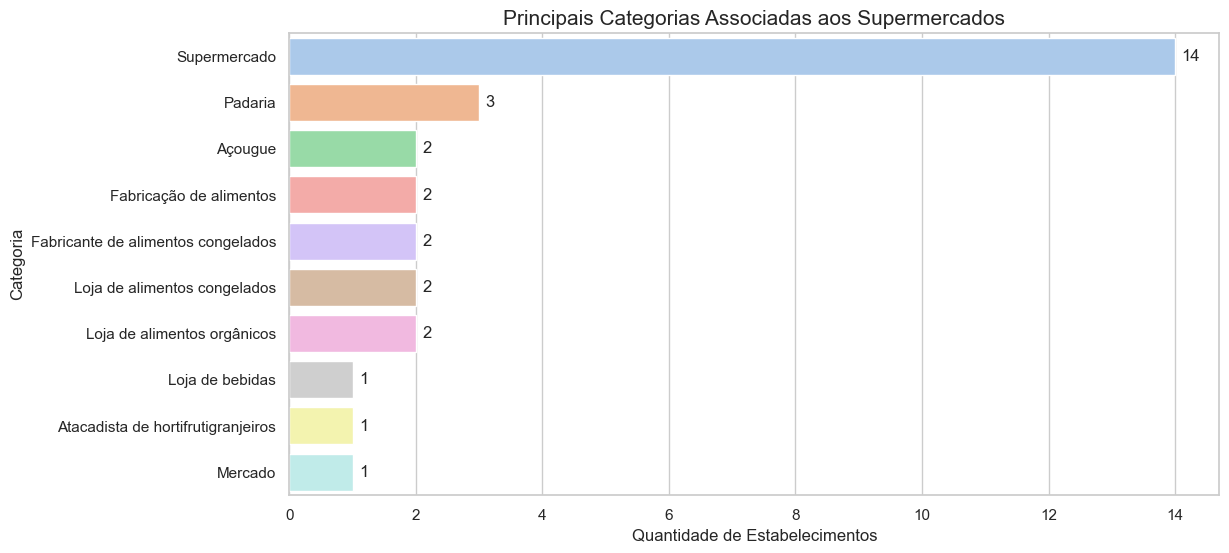

In [22]:
# 4. GRÁFICO: CATEGORIAS MAIS COMUNS

if 'categories' in df.columns:
    # "Explode" a lista de categorias para contar cada uma individualmente
    df_cat_exploded = df.explode('categories')
    
    # Conta as Top 10
    top_categorias = df_cat_exploded['categories'].value_counts().head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=top_categorias.values,
        y=top_categorias.index,
        hue=top_categorias.index,
        palette='pastel',
        legend=False
    )
    
    plt.title('Principais Categorias Associadas aos Supermercados', fontsize=15)
    plt.xlabel('Quantidade de Estabelecimentos')
    plt.ylabel('Categoria')
    
    # Adiciona os valores
    for i, v in enumerate(top_categorias.values):
        plt.text(v + 0.1, i, str(v), va='center')

    plt.show()
else:
    print("Coluna 'categories' não encontrada.")

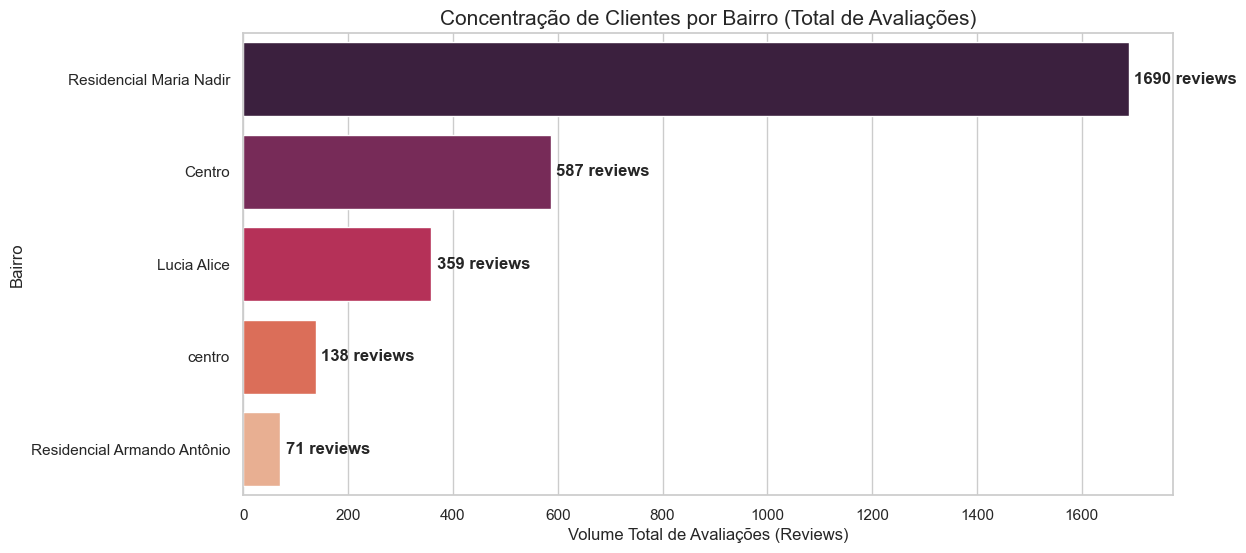

In [23]:
# 5. GRÁFICO (NOVO): BAIRROS MAIS MOVIMENTADOS (Total de Reviews)

if 'neighborhood' in df.columns and 'reviewsCount' in df.columns:
    # Agrupa por bairro e SOMA as avaliações
    movimento_bairro = df.groupby('neighborhood')['reviewsCount'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    
    # Gráfico de barras horizontais
    sns.barplot(
        x=movimento_bairro.values, 
        y=movimento_bairro.index, 
        hue=movimento_bairro.index,
        palette='rocket', # Paleta de cores quentes (intensidade)
        legend=False
    )

    plt.title('Concentração de Clientes por Bairro (Total de Avaliações)', fontsize=15)
    plt.xlabel('Volume Total de Avaliações (Reviews)')
    plt.ylabel('Bairro')

    # Adiciona os valores na frente das barras
    for i, v in enumerate(movimento_bairro.values):
        plt.text(v + 10, i, f"{int(v)} reviews", va='center', fontweight='bold')

    plt.show()
else:
    print("Colunas 'neighborhood' ou 'reviewsCount' não encontradas.")

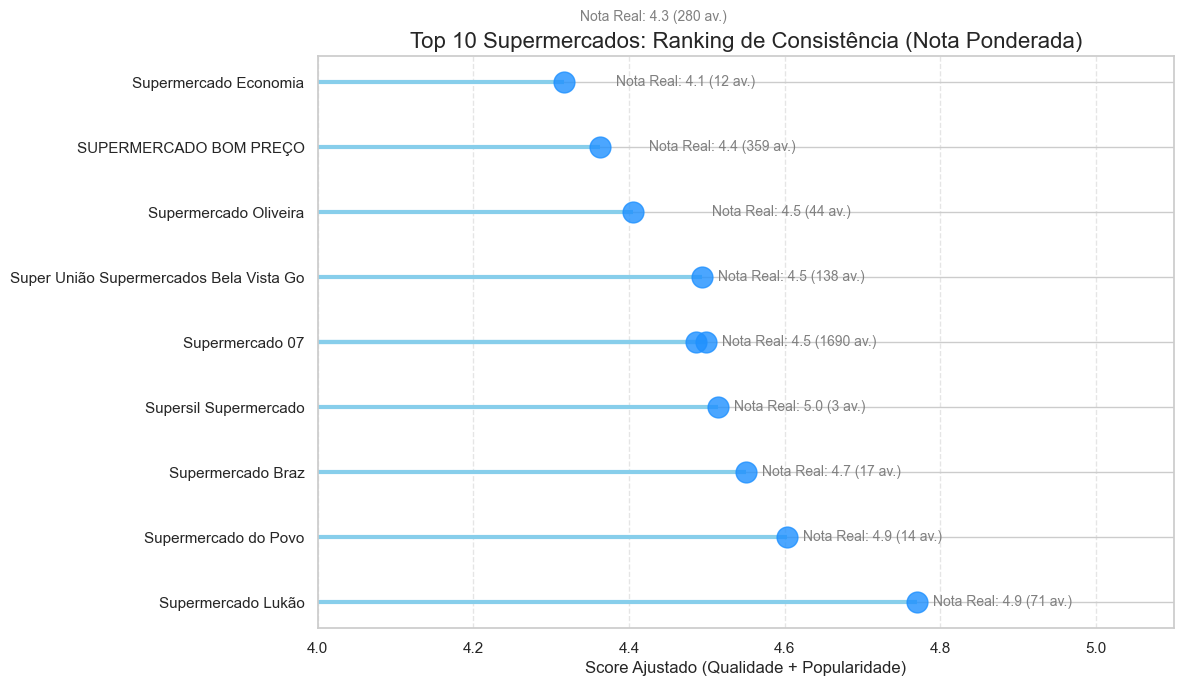

In [25]:
# 6. GRÁFICO (NOVO): RANKING PONDERADO (QUALIDADE REAL)

# Filtrar mercados com dados válidos
df_rank = df.dropna(subset=['totalScore', 'reviewsCount']).copy()

# --- FÓRMULA DE PONDERAÇÃO (IMDb) ---
# v = numero de votos
# R = nota media
# m = minimo de votos para ser listado (vamos usar o percentil 25 para ser justo)
# C = media de nota de todo o dataset

C = df_rank['totalScore'].mean()
m = df_rank['reviewsCount'].quantile(0.25) # Pelo menos 25% dos reviews

def weighted_rating(x, m=m, C=C):
    v = x['reviewsCount']
    R = x['totalScore']
    return (v / (v + m) * R) + (m / (v + m) * C)

# Cria a nova coluna de Score Ajustado
df_rank['Score_Ajustado'] = df_rank.apply(weighted_rating, axis=1)

# Pega os Top 10 baseados nessa nova métrica
top_ponderado = df_rank.sort_values('Score_Ajustado', ascending=False).head(10)

# --- PLOTAGEM ---
plt.figure(figsize=(12, 7))

# Criar um gráfico de "Pirulito" (Lollipop Chart) - Moderno e limpo
# Desenhamos linhas horizontais
plt.hlines(y=top_ponderado['title'], xmin=0, xmax=top_ponderado['Score_Ajustado'], color='skyblue', linewidth=3)
# Desenhamos os pontos na ponta
plt.plot(top_ponderado['Score_Ajustado'], top_ponderado['title'], "o", markersize=15, color='dodgerblue', alpha=0.8)

plt.title('Top 10 Supermercados: Ranking de Consistência (Nota Ponderada)', fontsize=16)
plt.xlabel('Score Ajustado (Qualidade + Popularidade)', fontsize=12)
plt.ylabel('')
plt.xlim(4.0, 5.1) # Foca na escala relevante (ajustar se necessário)

# Adicionar os valores de Nota Original vs Ajustada para comparação
for i, (score, original, reviews) in enumerate(zip(top_ponderado['Score_Ajustado'], top_ponderado['totalScore'], top_ponderado['reviewsCount'])):
    label = f"Nota Real: {original} ({int(reviews)} av.)"
    plt.text(score + 0.02, i, label, va='center', fontsize=10, color='gray')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()